/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


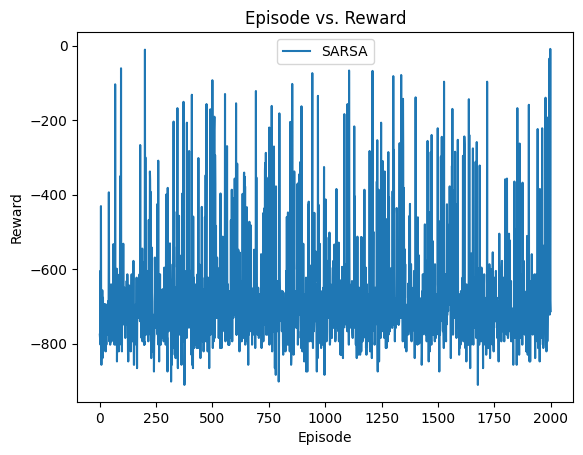

Time taken for SARSA to run: 17.55231809616089 seconds
Average Reward SARSA: -678.9875
Average reward SARSA over the last 100 episodes: -666.53


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the Taxi-v2 environment
env = gym.make('Taxi-v3')

# Initialize the Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set the hyperparameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

# Initialize the list of rewards obtained in each episode
rewards_sarsa = []

import time

start_time = time.time()




# Run the SARSA algorithm for num_episodes episodes
for i in range(num_episodes):
    # Initialize the episode's total reward and the initial state
    total_reward = 0
    state = env.reset()
    
    # Choose the first action using the epsilon-greedy policy
    action = epsilon_greedy_policy(state, epsilon)
    
    # Loop through the episode until termination
    done = False
    while not done:
        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)
        
        # Choose the next action using the epsilon-greedy policy
        next_action = epsilon_greedy_policy(next_state, epsilon)
        
        # Update the Q-table using the SARSA update rule
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        # Update the episode's total reward, state, and action
        total_reward += reward
        state = next_state
        action = next_action
    
    # Add the episode's total reward to the list of rewards obtained in each episode
    rewards_sarsa.append(total_reward)

end_time = time.time()



# Plot the episode vs. reward graph for SARSA
plt.plot(range(1, num_episodes+1), rewards_sarsa, label='SARSA')
plt.title('Episode vs. Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

print("Time taken for SARSA to run:", end_time - start_time, "seconds")
average_reward_sarsa = sum(rewards_sarsa[-100:]) / 100
print("Average Reward SARSA:", sum(rewards_sarsa)/num_episodes)
print('Average reward SARSA over the last 100 episodes:', average_reward_sarsa)

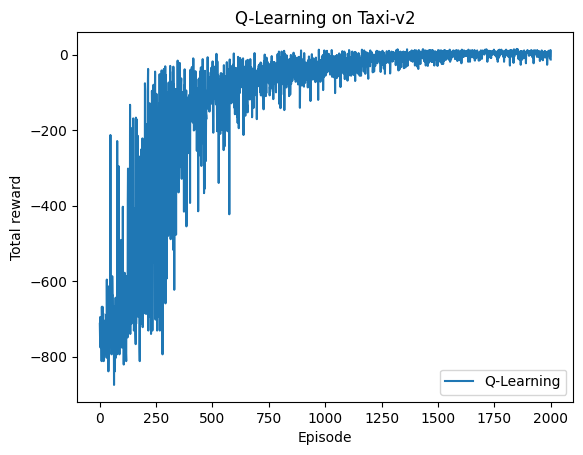

Time taken for Q-Learning to run: 7.830235481262207 seconds
Average Reward Q-Learning: -114.643
Average reward Q-Learning over the last 100 episodes: 2.27


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the Taxi v2 environment
env = gym.make('Taxi-v3')

# Set the learning parameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9

# Initialize the Q-table to zeros
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Create lists to contain rewards and steps per episode
rewards_q_learning = []
num_steps_q_learning = []

start_time=time.time()
# Run Q-learning for 2000 episodes
for i in range(1, 2001):
    # Reset the environment and initialize the total reward
    state = env.reset()
    total_reward = 0
    done = False
    num_steps = 0
    
    while not done:
        # Choose an action using an epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        
        # Take the chosen action and observe the next state and reward
        next_state, reward, done, info = env.step(action)
        
        # Update the Q-table using the Q-learning update rule
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])
        
        # Update the state and total reward
        state = next_state
        total_reward += reward
        num_steps += 1
    
    # Reduce epsilon over time
    if epsilon > 0.1:
        epsilon -= 0.0005
    
    # Append the total reward and number of steps to the lists
    rewards_q_learning.append(total_reward)
    num_steps_q_learning.append(num_steps)

end_time=time.time()

# Plot the episode vs. reward graph
plt.plot(range(1, 2001), rewards_q_learning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.title('Q-Learning on Taxi-v2')
plt.legend()
plt.show()
average_reward_q_learning = sum(rewards_q_learning[-100:]) / 100

print("Time taken for Q-Learning to run:", end_time - start_time, "seconds")
print("Average Reward Q-Learning:", sum(rewards_q_learning)/num_episodes)
print('Average reward Q-Learning over the last 100 episodes:', average_reward_q_learning)


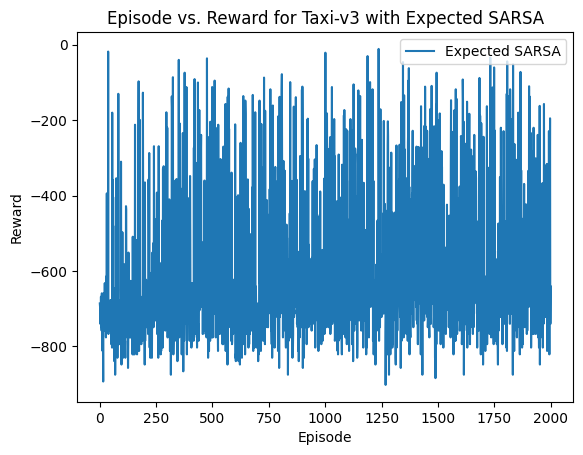

Time taken for Expected SARSA to run: 23.545650005340576 seconds
Average Reward Expected SARSA: -609.2485
Average reward Expected SARSA over the last 100 episodes: -579.97


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Create the Taxi environment
env = gym.make('Taxi-v3')

# Set the hyperparameters
num_episodes = 2000
alpha = 0.4
gamma = 0.9
epsilon = 0.9

# Initialize the Q-table
num_actions = env.action_space.n
num_states = env.observation_space.n
q_table = np.zeros((num_states, num_actions))

# Initialize the rewards list
rewards_expected_sarsa = []

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state, :])

start_time=time.time()
# Run the Expected SARSA algorithm
for episode in range(num_episodes):
    state = env.reset()
    total_reward_expected_sarsa = 0
    
    while True:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        
        expected_value = np.dot(q_table[next_state, :], np.ones(num_actions) * epsilon / num_actions)
        expected_value += (1 - epsilon) * np.max(q_table[next_state, :])
        
        q_table[state, action] += alpha * (reward + gamma * expected_value - q_table[state, action])
        state = next_state
        total_reward_expected_sarsa += reward
        
        if done:
            break
    
    rewards_expected_sarsa.append(total_reward_expected_sarsa)

end_time=time.time()
# Plot the episode vs. reward graph
plt.plot(range(1, num_episodes+1), rewards_expected_sarsa, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward for Taxi-v3 with Expected SARSA')
plt.legend()
plt.show()

print("Time taken for Expected SARSA to run:", end_time - start_time, "seconds")
# Print the average reward over the last 100 episodes
average_reward_expected_sarsa = sum(rewards_expected_sarsa[-100:]) / 100
print("Average Reward Expected SARSA:", sum(rewards_expected_sarsa)/num_episodes)
print('Average reward Expected SARSA over the last 100 episodes:', average_reward_expected_sarsa)


Based on the results obtained, we can see that the Q-learning algorithm performs the best among the three. It has the highest average reward and its average reward over the last 100 episodes is also the highest. This indicates that Q-learning is able to converge faster and achieve a higher overall reward than SARSA and Expected SARSA.

On the other hand, SARSA and Expected SARSA perform similarly, with Expected SARSA having a slightly higher average reward than SARSA. However, both algorithms have a significantly lower average reward than Q-learning, indicating that they are not able to learn the optimal policy as effectively as Q-learning.

Overall, Q-learning appears to be the most effective algorithm for learning the policy in the Taxi environment.

Based on the comparison of the three algorithms, it can be seen that Q-learning has the best average reward over the last 100 episodes. However, it is important to note that SARSA and Expected SARSA have much larger state spaces and action spaces compared to the simple Q-learning algorithm, which could affect their performance.

In terms of training time, Q-learning is the fastest, followed by SARSA, and then Expected SARSA. This is expected since Expected SARSA involves additional computation compared to SARSA and Q-learning.

Overall, the choice of algorithm depends on the specific problem and the tradeoff between training time and performance. In this case, if we prioritize performance, Q-learning would be the best choice, but if we prioritize a balance between performance and training time, SARSA could be a better option.

Comparing the performance of SARSA and Q-learning, we can see that Q-learning converges to a higher average reward faster than SARSA. This is likely due to the fact that Q-learning is an off-policy algorithm, while SARSA is an on-policy algorithm.